# Instructions:

## Getting Started
In this exercise, we will be using data from `rolling stone's top 500 albums`. We have this data contained in the `data.csv` file. We will be building out the following functions to answer questions and interact with this data.

> **remember:** reading from a csv file in python looks like the following:

```python 
import csv

    with open(file_name) as f:
        # we are using DictReader because we want our information to be in dictionary format.
        reader = csv.DictReader(f)
        # some more code
```

Once we have our `reader` reading our file as dictionaries, we want our data to be a list of dictionaries. So, we need to loop through our `reader` and create a list. *hint: list comprehension / for loops are your friend"

```python
# our data will look something like this once we have read it and turned it into a list of `OrderedDict`s
# don't worry, the ordered dicts look different but we can interact with them the same way we do normal dicts
[OrderedDict([('number', '1'), ('year', '1967'), ('album', "Sgt. Pepper's Lonely Hearts Club Band"), ('artist', 'The Beatles'), ('genre', 'Rock'), ('subgenre', 'Rock & Roll, Psychedelic Rock')]), OrderedDict([('number', '2'), ('year', '1966'), ('album', 'Pet Sounds'), ('artist', 'The Beach Boys'), ('genre', 'Rock'), ('subgenre', 'Pop Rock, Psychedelic Rock')]), OrderedDict([('number', '3'), ('year', '1966'), ('album', 'Revolver'), ('artist', 'The Beatles'), ('genre', 'Rock'), ('subgenre', 'Psychedelic Rock, Pop Rock')])]
```

After we have our data formated the way we want it, we can now begin working on defining our functions.


### Functions to build-out:

Each of the following functions can be defined in the `functions.py` file. 

* **Searching functions**
  * Find by name - Takes in a string that represents the name of an album. Should return a dictionary with the correct album, or return `None`.
  * Find by rank - Takes in a number that represents the rank in the list of top albums and returns the album with that rank. If there is no album with that rank, it returns `None`.
  * Find by year - Takes in a number for the year in which an album was released and returns a list of albums that were released in that year. If there are no albums released in the given year, it returns an empty list.
  * Find by years - Takes in a start year and end year. Returns a list of all albums that were released on or between the start and end years. If no albums are found for those years, then an empty list is returned. 
  * Find by ranks - Takes in a start rank and end rank. Returns a list of albums that are ranked between the start and end ranks. If no albums are found for those ranks, then an empty list is returned.
* **All functions**
  * All titles - Returns a list of titles for each album.
  * All artists - Returns a list of artist names for each album.
* **Questions to answer / functions**
  * Artists with the most albums - Returns the artist with the highest amount of albums on the list of top albums 
  * Most popular word - Returns the word used most in amongst all album titles
  * Histogram of albums by decade - Returns a histogram with each decade pointing to the number of albums released during that decade.
  * Histogram by genre - Returns a histogram with each genre pointing to the number of albums that are categorized as being in that genre.

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

In [2]:
style = 'dark_background'
plt.style.use(style)

In [3]:
import csv
from collections import OrderedDict
with open('data.csv') as f:
    reader = csv.DictReader(f)  #create findby name()
    songs = [{k:v for k, v in row.items()}
        for row in csv.DictReader(f, skipinitialspace = True)]
songs

[{'number': '1',
  'year': '1967',
  'album': "Sgt. Pepper's Lonely Hearts Club Band",
  'artist': 'The Beatles',
  'genre': 'Rock',
  'subgenre': 'Rock & Roll, Psychedelic Rock'},
 {'number': '2',
  'year': '1966',
  'album': 'Pet Sounds',
  'artist': 'The Beach Boys',
  'genre': 'Rock',
  'subgenre': 'Pop Rock, Psychedelic Rock'},
 {'number': '3',
  'year': '1966',
  'album': 'Revolver',
  'artist': 'The Beatles',
  'genre': 'Rock',
  'subgenre': 'Psychedelic Rock, Pop Rock'},
 {'number': '4',
  'year': '1965',
  'album': 'Highway 61 Revisited',
  'artist': 'Bob Dylan',
  'genre': 'Rock',
  'subgenre': 'Folk Rock, Blues Rock'},
 {'number': '5',
  'year': '1965',
  'album': 'Rubber Soul',
  'artist': 'The Beatles',
  'genre': 'Rock, Pop',
  'subgenre': 'Pop Rock'},
 {'number': '6',
  'year': '1971',
  'album': "What's Going On",
  'artist': 'Marvin Gaye',
  'genre': 'Funk / Soul',
  'subgenre': 'Soul'},
 {'number': '7',
  'year': '1972',
  'album': 'Exile on Main St.',
  'artist': 'Th

Find by name - Takes in a string that represents the name of an album. Should return a dictionary with the correct album, or return None.

In [141]:
def album_name(string, data):
        for album in data:
            if album['album'] == string:
                return album
            else: 
                None #else return none is better

In [142]:
album_name('London Calling', songs)

{'number': '8',
 'year': '1979',
 'album': 'London Calling',
 'artist': 'The Clash',
 'genre': 'Rock',
 'subgenre': 'Punk, New Wave'}

Find by rank - Takes in a number that represents the rank in the list of top albums and returns the album with that rank. If there is no album with that rank, it returns None.

In [21]:
def album_rank(string, data):
        for albums in data:
            if albums['number'] == string:
                return albums
            else: 
                None

In [23]:
album_rank('17', songs)

{'number': '17',
 'year': '1991',
 'album': 'Nevermind',
 'artist': 'Nirvana',
 'genre': 'Rock',
 'subgenre': 'Alternative Rock, Grunge'}

Find by year - Takes in a number for the year in which an album was released and returns a list of albums that were released in that year. If there are no albums released in the given year, it returns an empty list.

In [116]:
def album_year(string, data):
    song_year = []
    for albums in data: 
        if albums['year'] == string:
            song_year.append(albums)
        else:
            None
    return song_year

In [117]:
album_year("1977", songs)

[{'number': '26',
  'year': '1977',
  'album': 'Rumours',
  'artist': 'Fleetwood Mac',
  'genre': 'Rock',
  'subgenre': 'Pop Rock'},
 {'number': '41',
  'year': '1977',
  'album': "Never Mind the Bollocks Here's the Sex Pistols",
  'artist': 'Sex Pistols',
  'genre': 'Rock',
  'subgenre': 'Punk'},
 {'number': '70',
  'year': '1977',
  'album': 'The Stranger',
  'artist': 'Billy Joel',
  'genre': 'Rock',
  'subgenre': 'Pop Rock'},
 {'number': '81',
  'year': '1977',
  'album': 'The Clash',
  'artist': 'The Clash',
  'genre': 'Rock',
  'subgenre': 'Punk'},
 {'number': '106',
  'year': '1977',
  'album': 'Rocket to Russia',
  'artist': 'Ramones',
  'genre': 'Rock',
  'subgenre': 'Rock & Roll, Punk'},
 {'number': '130',
  'year': '1977',
  'album': 'Marquee Moon',
  'artist': 'Television',
  'genre': 'Rock',
  'subgenre': 'New Wave, Punk'},
 {'number': '132',
  'year': '1977',
  'album': 'Saturday Night Fever: The Original Movie Soundtrack Deluxe Edition',
  'artist': 'Various Artists',
  

Find by years - Takes in a start year and end year. Returns a list of all albums that were released on or between the start and end years. If no albums are found for those years, then an empty list is returned.

In [113]:
def album_in_years(start, end, data):
    song_years = []
    for album in data:
        if int(album['year']) >= start and int(album['year']) <= end:
            song_years.append(album)
    return song_years

In [148]:
a = [1,2,3]
b = [4,5,6]

In [149]:
a.extend(b)

In [150]:
a

[1, 2, 3, 4, 5, 6]

In [ ]:
find

In [144]:
album_in_years(1970, 1972, songs)

[{'number': '6',
  'year': '1971',
  'album': "What's Going On",
  'artist': 'Marvin Gaye',
  'genre': 'Funk / Soul',
  'subgenre': 'Soul'},
 {'number': '7',
  'year': '1972',
  'album': 'Exile on Main St.',
  'artist': 'The Rolling Stones',
  'genre': 'Rock',
  'subgenre': 'Blues Rock, Rock & Roll, Classic Rock'},
 {'number': '23',
  'year': '1970',
  'album': 'John Lennon/Plastic Ono Band',
  'artist': 'John Lennon / Plastic Ono Band',
  'genre': 'Rock',
  'subgenre': 'Pop Rock'},
 {'number': '28',
  'year': '1971',
  'album': "Who's Next",
  'artist': 'The Who',
  'genre': 'Rock',
  'subgenre': 'Hard Rock, Mod, Prog Rock, Psychedelic Rock'},
 {'number': '30',
  'year': '1971',
  'album': 'Blue',
  'artist': 'Joni Mitchell',
  'genre': 'Pop',
  'subgenre': 'Acoustic, Ballad, Folk'},
 {'number': '35',
  'year': '1972',
  'album': 'The Rise and Fall of Ziggy Stardust and the Spiders From Mars',
  'artist': 'David Bowie',
  'genre': 'Rock',
  'subgenre': 'Classic Rock, Glam'},
 {'number

Find by ranks - Takes in a start rank and end rank. Returns a list of albums that are ranked between the start and end ranks. If no albums are found for those ranks, then an empty list is returned.

In [40]:
def album_in_ranks(start, end, data):
    song_ranks = []
    for album in data:
        if int(album['number']) >= start and int(album['number']) <= end:
            song_ranks.append(album)
        else:
            None
    return song_ranks

In [41]:
album_in_ranks(7, 10, songs)

[{'number': '7',
  'year': '1972',
  'album': 'Exile on Main St.',
  'artist': 'The Rolling Stones',
  'genre': 'Rock',
  'subgenre': 'Blues Rock, Rock & Roll, Classic Rock'},
 {'number': '8',
  'year': '1979',
  'album': 'London Calling',
  'artist': 'The Clash',
  'genre': 'Rock',
  'subgenre': 'Punk, New Wave'},
 {'number': '9',
  'year': '1966',
  'album': 'Blonde on Blonde',
  'artist': 'Bob Dylan',
  'genre': 'Rock, Blues',
  'subgenre': 'Folk Rock, Rhythm & Blues'},
 {'number': '10',
  'year': '1968',
  'album': 'The Beatles ("The White Album")',
  'artist': 'The Beatles',
  'genre': 'Rock',
  'subgenre': 'Rock & Roll, Pop Rock, Psychedelic Rock, Experimental'}]

All titles - Returns a list of titles for each album.

In [54]:
def all_titles(data):
    album_titles = []
    for album in data:
        album_titles.append(album['album'])
    return album_titles

In [55]:
all_titles(songs)

["Sgt. Pepper's Lonely Hearts Club Band",
 'Pet Sounds',
 'Revolver',
 'Highway 61 Revisited',
 'Rubber Soul',
 "What's Going On",
 'Exile on Main St.',
 'London Calling',
 'Blonde on Blonde',
 'The Beatles ("The White Album")',
 'The Sun Sessions',
 'Kind of Blue',
 'The Velvet Underground & Nico',
 'Abbey Road',
 'Are You Experienced',
 'Blood on the Tracks',
 'Nevermind',
 'Born to Run',
 'Astral Weeks',
 'Thriller',
 'The Great Twenty Eight',
 'The Complete Recordings',
 'John Lennon/Plastic Ono Band',
 'Innervisions',
 'Live at the Apollo, 1962',
 'Rumours',
 'The Joshua Tree',
 "Who's Next",
 'Led Zeppelin',
 'Blue',
 'Bringing It All Back Home',
 'Let It Bleed',
 'Ramones',
 'Music From Big Pink',
 'The Rise and Fall of Ziggy Stardust and the Spiders From Mars',
 'Tapestry',
 'Hotel California',
 'The Anthology',
 'Please Please Me',
 'Forever Changes',
 "Never Mind the Bollocks Here's the Sex Pistols",
 'The Doors',
 'The Dark Side of the Moon',
 'Horses',
 'The Brown Album',
 

All artists - Returns a list of artist names for each album.

In [56]:
def all_artists(data):
    album_artists = []
    for album in data:
        album_artists.append(album['artist'])
    return album_artists

In [57]:
all_artists(songs)

['The Beatles',
 'The Beach Boys',
 'The Beatles',
 'Bob Dylan',
 'The Beatles',
 'Marvin Gaye',
 'The Rolling Stones',
 'The Clash',
 'Bob Dylan',
 'The Beatles',
 'Elvis Presley',
 'Miles Davis',
 'The Velvet Underground',
 'The Beatles',
 'The Jimi Hendrix Experience',
 'Bob Dylan',
 'Nirvana',
 'Bruce Springsteen',
 'Van Morrison',
 'Michael Jackson',
 'Chuck Berry',
 'Robert Johnson',
 'John Lennon / Plastic Ono Band',
 'Stevie Wonder',
 'James Brown',
 'Fleetwood Mac',
 'U2',
 'The Who',
 'Led Zeppelin',
 'Joni Mitchell',
 'Bob Dylan',
 'The Rolling Stones',
 'Ramones',
 'The Band',
 'David Bowie',
 'Carole King',
 'Eagles',
 'Muddy Waters',
 'The Beatles',
 'Love',
 'Sex Pistols',
 'The Doors',
 'Pink Floyd',
 'Patti Smith',
 'The Band',
 'Bob Marley & The Wailers',
 'John Coltrane',
 'Public Enemy',
 'The Allman Brothers Band',
 'Little Richard',
 'Simon & Garfunkel',
 'Al Green',
 'The Beatles',
 'Ray Charles',
 'The Jimi Hendrix Experience',
 'Elvis Presley',
 'Stevie Wonder'

In [4]:
all_genres = [album['genre'] for album in songs]

In [5]:
all_genres

['Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock, Pop',
 'Funk / Soul',
 'Rock',
 'Rock',
 'Rock, Blues',
 'Rock',
 'Rock',
 'Jazz',
 'Rock',
 'Rock',
 'Rock, Blues',
 'Rock',
 'Rock',
 'Rock',
 'Jazz, Rock, Blues, Folk, World, & Country',
 'Funk / Soul, Pop',
 'Rock',
 'Blues',
 'Rock',
 'Funk / Soul',
 'Funk / Soul',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Pop',
 'Rock, Folk, World, & Country',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock, Pop',
 'Rock',
 'Folk, World, & Country',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Classical, Stage & Screen',
 'Reggae',
 'Jazz',
 'Hip Hop',
 'Rock, Blues',
 'Rock, Blues',
 'Rock',
 'Funk / Soul',
 'Rock',
 'Jazz, Funk / Soul',
 'Rock, Blues',
 'Rock',
 'Funk / Soul',
 'Rock, Funk / Soul, Pop',
 'Rock',
 'Funk / Soul',
 'Rock',
 'Electronic, Rock',
 'Rock',
 'Rock, Funk / Soul, Pop',
 'Jazz, Rock, Funk / Soul, Folk, World, & Country',
 'Electronic, Rock',
 'Funk / Soul, Pop',
 'Rock',
 'Rock',
 'Jazz, Rock, Funk / Soul, Pop, Folk, World, & 

Artists with the most albums - Returns the artist with the highest amount of albums on the list of top albums

In [60]:
def most_popular_artist(data):
    counter_dict = {}
    for artist in all_artists(data):
        if artist in counter_dict: 
            counter_dict[artist] += 1 
        else: 
            counter_dict[artist] = 1
    maximum_albums = max(counter_dict.values())
    artist_lists = []
    for keys, values in counter_dict.items():
        if values == maximum_albums:
            artist_lists.append(keys) 
    return artist_lists

In [61]:
most_popular_artist(songs)

['The Beatles', 'Bob Dylan', 'The Rolling Stones']

Most popular word - Returns the word used most in amongst all album titles

In [62]:
def top_word(data):
    words = []
    for word in all_titles(data):
        words.append(word.split())
    flat_list = [item for sublist in words for item in sublist]
    return max(flat_list, key = flat_list.count)

In [63]:
top_word(songs)

'The'

In [67]:
def decade_list(data):
    years = [(int(album['year'])//10*10) for album in data]
    return years

In [68]:
decade_list(songs)

[1960,
 1960,
 1960,
 1960,
 1960,
 1970,
 1970,
 1970,
 1960,
 1960,
 1970,
 1950,
 1960,
 1960,
 1960,
 1970,
 1990,
 1970,
 1960,
 1980,
 1980,
 1990,
 1970,
 1970,
 1960,
 1970,
 1980,
 1970,
 1960,
 1970,
 1960,
 1960,
 1970,
 1960,
 1970,
 1970,
 1970,
 2000,
 1960,
 1960,
 1970,
 1960,
 1970,
 1970,
 1960,
 1980,
 1960,
 1980,
 1970,
 1950,
 1970,
 1970,
 1960,
 1990,
 1960,
 1950,
 1970,
 1960,
 1970,
 1970,
 1980,
 1990,
 1970,
 1990,
 1970,
 2000,
 1970,
 1970,
 1970,
 1980,
 1970,
 1970,
 1970,
 1990,
 1980,
 1980,
 1960,
 1960,
 1970,
 1970,
 1970,
 1960,
 1960,
 1960,
 1980,
 1970,
 1960,
 1960,
 1970,
 1970,
 1970,
 1980,
 1980,
 1970,
 1960,
 1960,
 1970,
 1970,
 1960,
 1950,
 1960,
 1950,
 1970,
 1970,
 2000,
 1970,
 1960,
 1970,
 1990,
 1960,
 1970,
 1960,
 1960,
 1960,
 1970,
 2000,
 1960,
 1960,
 1960,
 1970,
 1980,
 1960,
 1970,
 1970,
 1960,
 1970,
 1980,
 1970,
 1970,
 1970,
 1970,
 1990,
 1990,
 1970,
 1980,
 1990,
 1970,
 1970,
 1960,
 1960,
 1960,
 1980,
 1970,

Histogram of albums by decade - Returns a histogram with each decade pointing to the number of albums released during that decade.

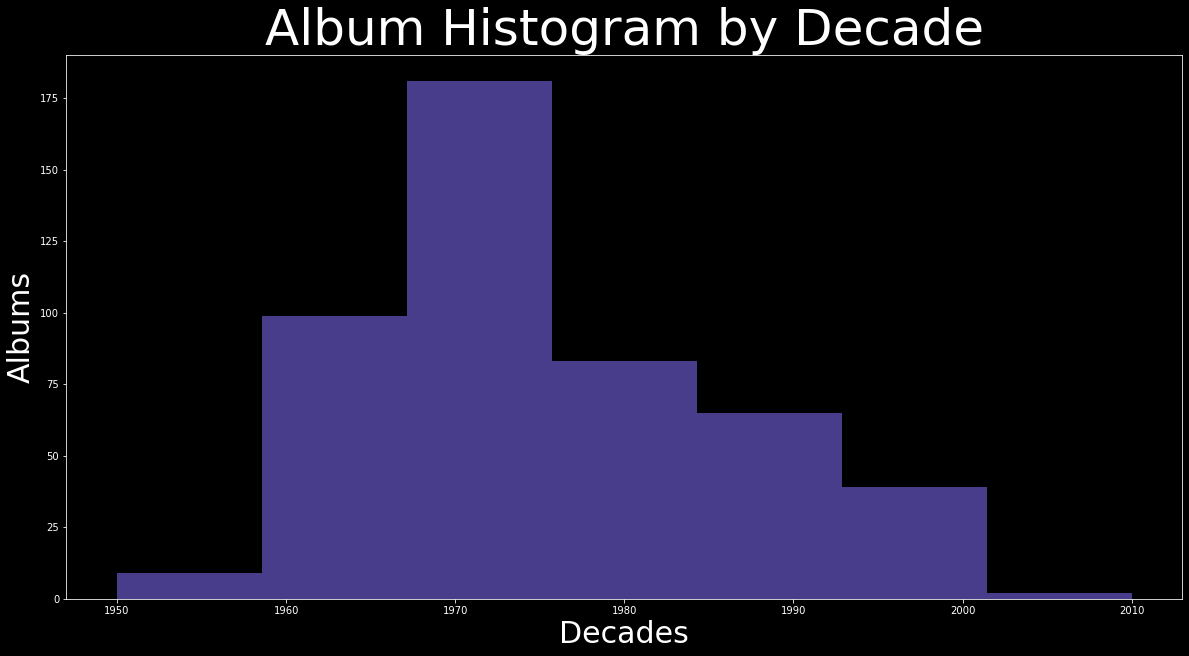

In [152]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(decade_list(songs), bins=7, color='darkslateblue')
ax.set_xlabel('Decades', size=30);
ax.set_ylabel('Albums', size=30)
ax.set_title('Album Histogram by Decade', size=50);
plt.show()   

In [70]:
def genre_list(data):
    for genre in data:
        genres = [album['genre'].split() for album in data]

    return genres

In [71]:
genre_list(songs)

[['Rock'],
 ['Rock'],
 ['Rock'],
 ['Rock'],
 ['Rock,', 'Pop'],
 ['Funk', '/', 'Soul'],
 ['Rock'],
 ['Rock'],
 ['Rock,', 'Blues'],
 ['Rock'],
 ['Rock'],
 ['Jazz'],
 ['Rock'],
 ['Rock'],
 ['Rock,', 'Blues'],
 ['Rock'],
 ['Rock'],
 ['Rock'],
 ['Jazz,', 'Rock,', 'Blues,', 'Folk,', 'World,', '&', 'Country'],
 ['Funk', '/', 'Soul,', 'Pop'],
 ['Rock'],
 ['Blues'],
 ['Rock'],
 ['Funk', '/', 'Soul'],
 ['Funk', '/', 'Soul'],
 ['Rock'],
 ['Rock'],
 ['Rock'],
 ['Rock'],
 ['Pop'],
 ['Rock,', 'Folk,', 'World,', '&', 'Country'],
 ['Rock'],
 ['Rock'],
 ['Rock'],
 ['Rock'],
 ['Rock,', 'Pop'],
 ['Rock'],
 ['Folk,', 'World,', '&', 'Country'],
 ['Rock'],
 ['Rock'],
 ['Rock'],
 ['Rock'],
 ['Rock'],
 ['Rock'],
 ['Classical,', 'Stage', '&', 'Screen'],
 ['Reggae'],
 ['Jazz'],
 ['Hip', 'Hop'],
 ['Rock,', 'Blues'],
 ['Rock,', 'Blues'],
 ['Rock'],
 ['Funk', '/', 'Soul'],
 ['Rock'],
 ['Jazz,', 'Funk', '/', 'Soul'],
 ['Rock,', 'Blues'],
 ['Rock'],
 ['Funk', '/', 'Soul'],
 ['Rock,', 'Funk', '/', 'Soul,', 'Pop'],
 [

In [118]:
def broken_out_genre(data):
    genres = []
    for genre in genre_list(songs):
        genres.append(genre.split(", "))
    flat_list_genre = []
    for sublist in genres:
        for item in sublist:
            flat_list_genre.append(item)
    return flat_list_genre

In [153]:
broken_out_genre(songs)

{'& Country',
 '& Country,Stage & Screen',
 'Blues',
 'Classical',
 'Electronic',
 'Electronic,Stage & Screen',
 'Folk',
 'Funk / Soul',
 'Funk / Soul,Folk',
 'Hip Hop',
 'Jazz',
 'Latin',
 'Pop',
 'Reggae',
 'Reggae,Pop,Folk',
 'Rock',
 'Stage & Screen',
 'World'}

Histogram by genre - Returns a histogram with each genre pointing to the number of albums that are categorized as being in that genre.

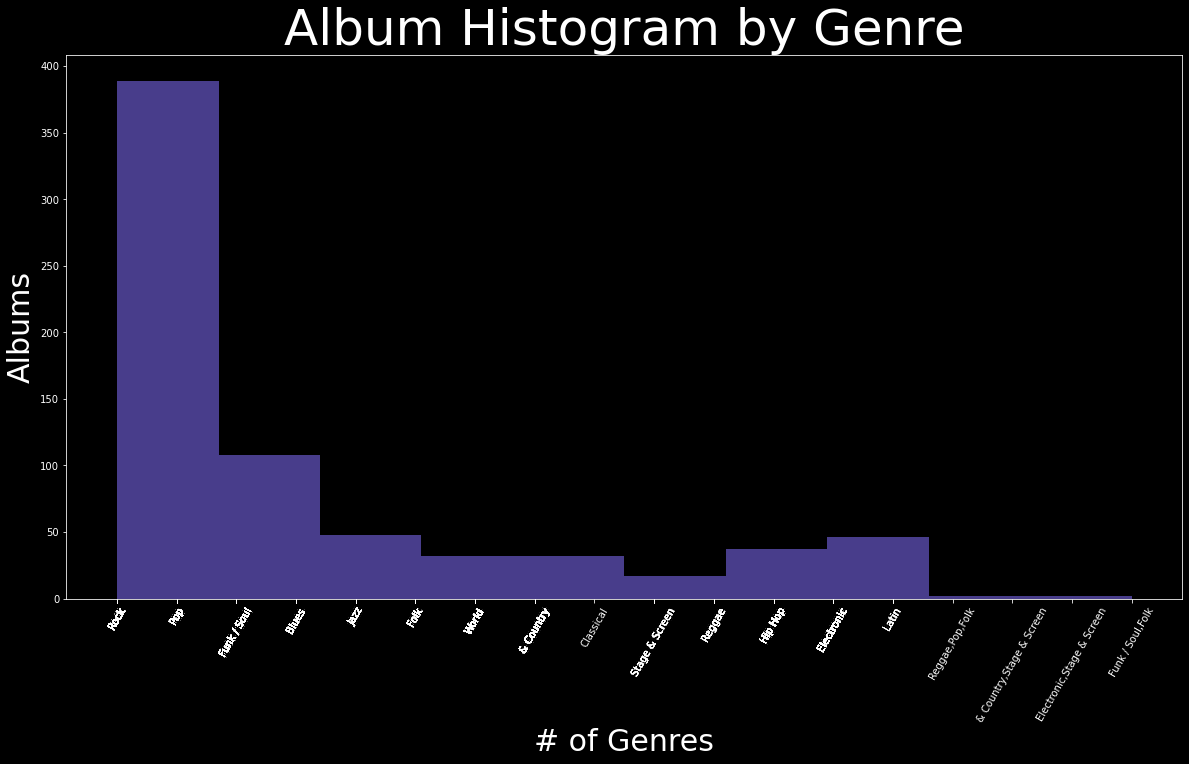

In [128]:
def genre_list(data):
    for genre in data:
        genres = [album['genre'] for album in data]

    return genres
broken_out_genre(songs)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('# of Genres', size=30);
ax.set_ylabel('Albums', size=30)
ax.set_title('Album Histogram by Genre', size=50);
plt.hist(broken_out_genre(songs), bins = 10, color='darkslateblue')
plt.xticks(broken_out_genre(songs), #size of ticks on x-axis
                        rotation = 60);

## Next Steps

In [79]:
text_file = open('top-500-songs.txt', 'r')
lines = text_file.readlines()

print(lines)

['1\tLike a Rolling Stone\tBob Dylan\t1965\n', '2\tSatisfaction\tThe Rolling Stones\t1965\n', '3\tImagine\tJohn Lennon\t1971\n', "4\tWhat's Going On\tMarvin Gaye\t1971\n", '5\tRespect\tAretha Franklin\t1967\n', '6\tGood Vibrations\tThe Beach Boys\t1966\n', '7\tJohnny B. Goode\tChuck Berry\t1958\n', '8\tHey Jude\tThe Beatles\t1968\n', '9\tSmells Like Teen Spirit\tNirvana\t1991\n', "10\tWhat'd I Say\tRay Charles\t1959\n", '11\tMy Generation\tThe Who\t1965\n', '12\tA Change Is Gonna Come\tSam Cooke\t1964\n', '13\tYesterday\tThe Beatles\t1965\n', "14\tBlowin' in the Wind\tBob Dylan\t1963\n", '15\tLondon Calling\tThe Clash\t1980\n', '16\tI Want to Hold Your Hand\tThe Beatles\t1963\n', '17\tPurple Haze\tThe Jimi Hendrix Experience\t1967\n', '18\tMaybellene\tChuck Berry\t1955\n', '19\tHound Dog\tElvis Presley\t1956\n', '20\tLet It Be\tThe Beatles\t1970\n', '21\tBorn to Run\tBruce Springsteen\t1975\n', '22\tBe My Baby\tThe Ronettes\t1963\n', '23\tIn My Life\tThe Beatles\t1965\n', '24\tPeople G

Now that we have our functions querying our Album data, let's compare that data with the top 500 songs. We have another file -- a text file! -- that contains the data we need for the top 500 songs. Reading a text file is pretty similar to reading a csv file, however, it tends to need a bit more massaging to get your data formatted the way you want it.

```python
    # open the text file in read
    text_file = open('top-500-songs.txt', 'r')
    # read each line of the text file
    # here is where you can print out the lines to your terminal and get an idea 
    # for how you might think about re-formatting the data
    lines = text_file.readlines()

    print(lines)
    # the output will look something like this:
['1\tLike a Rolling Stone\tBob Dylan\t1965\n', '2\tSatisfaction\tThe Rolling Stones\t1965\n', '3\tImagine\tJohn Lennon\t1971\n', "4\tWhat's Going On\tMarvin Gaye\t1971\n", '5\tRespect\tAretha Franklin\t1967\n', '6\tGood Vibrations\tThe Beach Boys\t1966\n', '7\tJohnny B. Goode\tChuck Berry\t1958\n', '8\tHey Jude\tThe Beatles\t1968\n', ...]
```

It looks like `\t` is how the text file is separating each element on a line. So, we need a function that can separate a string into a list. Then we can tell this function on what to split our string (i.e. `\t`). From there we will have a list of lists that are formatted like the following:
```python
["RANK", "NAME", "ARTIST", "YEAR"]
```
We need to use our knowledge of iterating to go through each of these elements and turn them into dictionaries with the keys, "rank", "name", "artist", "year", pointing to the appropriate values. So, for song number 1, we want it to look like:
```python
{'rank': 1, 'name': "Like a Rolling Stone", 'artist'"Bob Dylan": , 'year': 1965}
```

Once we have a list of songs that are formatted like the above, we can move on to figuring out which songs are from the top albums and which albums and artists have the most 'top songs'.

In [80]:
list_songs = [(lines[x].split('\t')) for x in range(len(lines))]

In [81]:
list_songs

[['1', 'Like a Rolling Stone', 'Bob Dylan', '1965\n'],
 ['2', 'Satisfaction', 'The Rolling Stones', '1965\n'],
 ['3', 'Imagine', 'John Lennon', '1971\n'],
 ['4', "What's Going On", 'Marvin Gaye', '1971\n'],
 ['5', 'Respect', 'Aretha Franklin', '1967\n'],
 ['6', 'Good Vibrations', 'The Beach Boys', '1966\n'],
 ['7', 'Johnny B. Goode', 'Chuck Berry', '1958\n'],
 ['8', 'Hey Jude', 'The Beatles', '1968\n'],
 ['9', 'Smells Like Teen Spirit', 'Nirvana', '1991\n'],
 ['10', "What'd I Say", 'Ray Charles', '1959\n'],
 ['11', 'My Generation', 'The Who', '1965\n'],
 ['12', 'A Change Is Gonna Come', 'Sam Cooke', '1964\n'],
 ['13', 'Yesterday', 'The Beatles', '1965\n'],
 ['14', "Blowin' in the Wind", 'Bob Dylan', '1963\n'],
 ['15', 'London Calling', 'The Clash', '1980\n'],
 ['16', 'I Want to Hold Your Hand', 'The Beatles', '1963\n'],
 ['17', 'Purple Haze', 'The Jimi Hendrix Experience', '1967\n'],
 ['18', 'Maybellene', 'Chuck Berry', '1955\n'],
 ['19', 'Hound Dog', 'Elvis Presley', '1956\n'],
 ['20'

We need to use our knowledge of iterating to go through each of these elements and turn them into dictionaries with the keys, "rank", "name", "artist", "year", pointing to the appropriate values. So, for song number 1, we want it to look like:

In [82]:
def ranking(data):
    rank_items = []
    for line in data:
        rank_dict = {}
        rank_dict["Rank"]=line[0]
        rank_dict["Name"]=line[1]
        rank_dict["Artist"]=line[2]
        rank_dict["Year"]=line[3][:-1]
        rank_items.append(rank_dict)
    return rank_items

In [83]:
ranking(list_songs)

[{'Rank': '1',
  'Name': 'Like a Rolling Stone',
  'Artist': 'Bob Dylan',
  'Year': '1965'},
 {'Rank': '2',
  'Name': 'Satisfaction',
  'Artist': 'The Rolling Stones',
  'Year': '1965'},
 {'Rank': '3', 'Name': 'Imagine', 'Artist': 'John Lennon', 'Year': '1971'},
 {'Rank': '4',
  'Name': "What's Going On",
  'Artist': 'Marvin Gaye',
  'Year': '1971'},
 {'Rank': '5', 'Name': 'Respect', 'Artist': 'Aretha Franklin', 'Year': '1967'},
 {'Rank': '6',
  'Name': 'Good Vibrations',
  'Artist': 'The Beach Boys',
  'Year': '1966'},
 {'Rank': '7',
  'Name': 'Johnny B. Goode',
  'Artist': 'Chuck Berry',
  'Year': '1958'},
 {'Rank': '8', 'Name': 'Hey Jude', 'Artist': 'The Beatles', 'Year': '1968'},
 {'Rank': '9',
  'Name': 'Smells Like Teen Spirit',
  'Artist': 'Nirvana',
  'Year': '1991'},
 {'Rank': '10',
  'Name': "What'd I Say",
  'Artist': 'Ray Charles',
  'Year': '1959'},
 {'Rank': '11', 'Name': 'My Generation', 'Artist': 'The Who', 'Year': '1965'},
 {'Rank': '12',
  'Name': 'A Change Is Gonna C

In [84]:
ranked_dict = ranking(list_songs)

### Working with the top 500 songs

If we can't already re-use our searching functions (i.e. Find by name, Find by rank, Find by year, Find by years, Find by ranks), all functions (i.e. all titles, all artists), and questions-to-answer functions (i.e. Artists with the most albums (or songs), Most popular word, Histogram by decade, Histogram by genre) with the song data we just formatted, then refactor these functions so that they can be used with either set of data. This is a good practice for ensuring that our code is as reusable and modular as possible, which is important when writing code for any project, especially when it comes time to scale a project. Things are easier to read, and there is less code to worry about (and more importantly there is less code to debug when something goes wrong).

Once we have our functions working for both sets of data, we can start writing new functions!

Luckily for us, this next dataset is already made for us. We were curious to find out which songs on the top 500 songs overlapped with the top albums and vice versa. So, we created a data set that is a list of dictionaries in JSON format. Each dictionary contains the name of the artist, the album, and the tracks (songs) on that given album. We can use this data to check which songs on the top 500 list are featured on the albums on the top albums list.

To load our JSON file we will write:

```python
import json

file = open('track_data.json', 'r')
json_data = json.load(file)

print(json_data)
# output will look like this:
[{'artist': 'The Beatles', 'album': "Sgt. Pepper's Lonely Hearts Club Band", 'tracks': ["Sgt. Pepper's Lonely Hearts Club Band - Remix", 'With A Little Help From My Friends - Remix', 'Lucy In The Sky With Diamonds - Remix', 'Getting Better - Remix', 'Fixing A Hole - Remix', "She's Leaving Home - Remix", 'Being For The Benefit Of Mr. Kite! - Remix', 'Within You Without You - Remix', "When I'm Sixty-Four - Remix", 'Lovely Rita - Remix', 'Good Morning Good Morning - Remix', "Sgt. Pepper's Lonely Hearts Club Band (Reprise) - Remix", 'A Day In The Life - Remix', "Sgt. Pepper's Lonely Hearts Club Band - Take 9 And Speech", 'With A Little Help From My Friends - Take 1 / False Start And Take 2 / Instrumental', 'Lucy In The Sky With Diamonds - Take 1', 'Getting Better - Take 1 / Instrumental And Speech At The End', 'Fixing A Hole - Speech And Take 3', "She's Leaving Home - Take 1 / Instrumental", 'Being For The Benefit Of Mr. Kite! - Take 4', 'Within You Without You - Take 1 / Indian Instruments', "When I'm Sixty-Four - Take 2", 'Lovely Rita - Speech And Take 9', 'Good Morning Good Morning - Take 8', "Sgt. Pepper's Lonely Hearts Club Band (Reprise) - Speech And Take 8", 'A Day In The Life - Take 1 With Hums', 'Strawberry Fields Forever - Take 7', 'Strawberry Fields Forever - Take 26', 'Strawberry Fields Forever - Stereo Mix 2015', 'Penny Lane - Take 6 / Instrumental', 'Penny Lane - Stereo Mix 2017']}, {'artist': 'The Beach Boys', 'album': 'Pet Sounds', 'tracks': ["Wouldn't It Be Nice - Digitally Remastered 96", 'You Still Believe In Me - Digitally Remastered 96', "That's Not Me - 1996 Digital Remaster", "Don't Talk (Put Your Head On My Shoulder) - 1996 Digital Remaster", "I'm Waiting For The Day - Digitally Remastered 96", "Let's Go Away For Awhile - Digitally Remastered 96", 'Sloop John B - 1996 - Remaster', 'God Only Knows - 1997 - Remaster', "I Know There's An Answer - Digitally Remastered 96", 'Here Today - Digitally Remastered 96', "I Just Wasn't Made For These Times - Digitally Remastered 96", 'Pet Sounds - Digitally Remastered 96', 'Caroline, No - 1996 Digital Remaster', 'Hang On To Your Ego', "Wouldn't It Be Nice - 2000 - Remaster", 'You Still Believe In Me - 1996 Digital Remaster', "That's Not Me - 1996 Digital Remaster", "Don't Talk (Put Your Head On My Shoulder) - 1996 Digital Remaster", "I'm Waiting For The Day - 1996 Digital Remaster", "Let's Go Away For Awhile - 1996 Digital Remaster", 'Sloop John B - 1996 Digital Remaster', 'God Only Knows - 1996 Digital Remaster', "I Know There's An Answer - 1996 Digital Remaster", 'Here Today - 1996 Digital Remaster', "I Just Wasn't Made For These Times - 1996 Digital Remaster", 'Pet Sounds - 1996 Digital Remaster', 'Caroline, No - 1996 Digital Remaster']}, {'artist': 'The Beatles', 'album': 'Revolver', 'tracks': ['Taxman - Remastered', 'Eleanor Rigby - Remastered', "I'm Only Sleeping - Remastered", 'Love You To - Remastered', 'Here, There And Everywhere - Remastered', 'Yellow Submarine - Remastered', 'She Said She Said - Remastered', 'Good Day Sunshine - Remastered', 'And Your Bird Can Sing - Remastered', 'For No One - Remastered', 'Doctor Robert - Remastered', 'I Want To Tell You - Remastered', 'Got To Get You Into My Life - Remastered', 'Tomorrow Never Knows - Remastered']}, {'artist': 'Bob Dylan', 'album': 'Highway 61 Revisited', 'tracks': ['Like a Rolling Stone', 'Tombstone Blues', 'It Takes a Lot to Laugh, It Takes a Train to Cry', 'From a Buick 6', 'Ballad of a Thin Man', 'Queen Jane Approximately', 'Highway 61 Revisited', "Just Like Tom Thumb's Blues", 'Desolation Row']}, ...]
```

In [85]:
import json

file = open('track_data.json', 'r')
json_data = json.load(file)

In [86]:
print(json_data)

[{'artist': 'The Beatles', 'album': "Sgt. Pepper's Lonely Hearts Club Band", 'tracks': ["Sgt. Pepper's Lonely Hearts Club Band - Remix", 'With A Little Help From My Friends - Remix', 'Lucy In The Sky With Diamonds - Remix', 'Getting Better - Remix', 'Fixing A Hole - Remix', "She's Leaving Home - Remix", 'Being For The Benefit Of Mr. Kite! - Remix', 'Within You Without You - Remix', "When I'm Sixty-Four - Remix", 'Lovely Rita - Remix', 'Good Morning Good Morning - Remix', "Sgt. Pepper's Lonely Hearts Club Band (Reprise) - Remix", 'A Day In The Life - Remix', "Sgt. Pepper's Lonely Hearts Club Band - Take 9 And Speech", 'With A Little Help From My Friends - Take 1 / False Start And Take 2 / Instrumental', 'Lucy In The Sky With Diamonds - Take 1', 'Getting Better - Take 1 / Instrumental And Speech At The End', 'Fixing A Hole - Speech And Take 3', "She's Leaving Home - Take 1 / Instrumental", 'Being For The Benefit Of Mr. Kite! - Take 4', 'Within You Without You - Take 1 / Indian Instrument

In [87]:
def all_titles(data):
    album_titles = []
    for album in data:
        album_titles.append(album['album'])
    return album_titles

In [88]:
all_titles(json_data)

["Sgt. Pepper's Lonely Hearts Club Band",
 'Pet Sounds',
 'Revolver',
 'Highway 61 Revisited',
 'Rubber Soul',
 "What's Going On",
 'Exile on Main St.',
 'London Calling',
 'Blonde on Blonde',
 'The Beatles ("The White Album")',
 'The Sun Sessions',
 'Kind of Blue',
 'The Velvet Underground & Nico',
 'Abbey Road',
 'Are You Experienced',
 'Blood on the Tracks',
 'Nevermind',
 'Born to Run',
 'Astral Weeks',
 'Thriller',
 'The Great Twenty Eight',
 'The Complete Recordings',
 'John Lennon/Plastic Ono Band',
 'Innervisions',
 'Live at the Apollo, 1962',
 'Rumours',
 'The Joshua Tree',
 "Who's Next",
 'Led Zeppelin',
 'Blue',
 'Bringing It All Back Home',
 'Let It Bleed',
 'Ramones',
 'Music From Big Pink',
 'The Rise and Fall of Ziggy Stardust and the Spiders From Mars',
 'Tapestry',
 'Hotel California',
 'The Anthology',
 'Please Please Me',
 'Forever Changes',
 "Never Mind the Bollocks Here's the Sex Pistols",
 'The Doors',
 'The Dark Side of the Moon',
 'Horses',
 'The Brown Album',
 

In [89]:
def all_artists(data):
    artist_list=[]
    for albums in data:
        artist_list.append(albums['artist'])
    return artist_list

In [90]:
all_artists(json_data)

['The Beatles',
 'The Beach Boys',
 'The Beatles',
 'Bob Dylan',
 'The Beatles',
 'Marvin Gaye',
 'The Rolling Stones',
 'The Clash',
 'Bob Dylan',
 'The Beatles',
 'Elvis Presley',
 'Miles Davis',
 'The Velvet Underground',
 'The Beatles',
 'The Jimi Hendrix Experience',
 'Bob Dylan',
 'Nirvana',
 'Bruce Springsteen',
 'Van Morrison',
 'Michael Jackson',
 'Chuck Berry',
 'Robert Johnson',
 'John Lennon / Plastic Ono Band',
 'Stevie Wonder',
 'James Brown',
 'Fleetwood Mac',
 'U2',
 'The Who',
 'Led Zeppelin',
 'Joni Mitchell',
 'Bob Dylan',
 'The Rolling Stones',
 'Ramones',
 'The Band',
 'David Bowie',
 'Carole King',
 'Eagles',
 'Muddy Waters',
 'The Beatles',
 'Love',
 'Sex Pistols',
 'The Doors',
 'Pink Floyd',
 'Patti Smith',
 'The Band',
 'Bob Marley & The Wailers',
 'John Coltrane',
 'Public Enemy',
 'The Allman Brothers Band',
 'Little Richard',
 'Simon & Garfunkel',
 'Al Green',
 'The Beatles',
 'Ray Charles',
 'The Jimi Hendrix Experience',
 'Elvis Presley',
 'Stevie Wonder'

AlbumWithMostTopSongs - returns the name of the artist and album that has that most songs featured on the top 500 songs list

In [93]:
def albums_with_most_top_songs():
    artist_discog = []
    freq_dict = {}
    for name in ranked_dict:
        artist_discog.append(name['Name'])
    for x in artist_discog:
        if x in freq_dict:
            freq_dict[x] += 1
        else:
            freq_dict[x] = 1
    for value in range(len(json_data)): 
        if json_data[value]['tracks'] == artist_discog: 
            freq_dict[x] += 1

    return freq_dict

In [154]:
string = 'my_string'
for x in string:
    

for i in range(len(string)):
    print(i)
    print(string[i])

0
m
1
y
2
_
3
s
4
t
5
r
6
i
7
n
8
g


In [94]:
json_data[0]

{'artist': 'The Beatles',
 'album': "Sgt. Pepper's Lonely Hearts Club Band",
 'tracks': ["Sgt. Pepper's Lonely Hearts Club Band - Remix",
  'With A Little Help From My Friends - Remix',
  'Lucy In The Sky With Diamonds - Remix',
  'Getting Better - Remix',
  'Fixing A Hole - Remix',
  "She's Leaving Home - Remix",
  'Being For The Benefit Of Mr. Kite! - Remix',
  'Within You Without You - Remix',
  "When I'm Sixty-Four - Remix",
  'Lovely Rita - Remix',
  'Good Morning Good Morning - Remix',
  "Sgt. Pepper's Lonely Hearts Club Band (Reprise) - Remix",
  'A Day In The Life - Remix',
  "Sgt. Pepper's Lonely Hearts Club Band - Take 9 And Speech",
  'With A Little Help From My Friends - Take 1 / False Start And Take 2 / Instrumental',
  'Lucy In The Sky With Diamonds - Take 1',
  'Getting Better - Take 1 / Instrumental And Speech At The End',
  'Fixing A Hole - Speech And Take 3',
  "She's Leaving Home - Take 1 / Instrumental",
  'Being For The Benefit Of Mr. Kite! - Take 4',
  'Within You

In [95]:
ranked_dict[:2]

[{'Rank': '1',
  'Name': 'Like a Rolling Stone',
  'Artist': 'Bob Dylan',
  'Year': '1965'},
 {'Rank': '2',
  'Name': 'Satisfaction',
  'Artist': 'The Rolling Stones',
  'Year': '1965'}]

AlbumsWithTopSongs - returns a list with the name of only the albums that have tracks featured on the list of top 500 songs

In [137]:
def albums_with_top_songs():
    artist_discog = []
    freq_dict = {}
    for name in ranked_dict:
        artist_discog.append(name['Name'])
    for x in artist_discog:
        if x in freq_dict:
            freq_dict[x] += 1
        else:
            freq_dict[x] = 1
    for value in range(len(json_data)): 
        if json_data[value]['tracks'] == artist_discog: 
            freq_dict[x] += 1

    return freq_dict

In [138]:
top_song()

{'Like a Rolling Stone': 1,
 'Satisfaction': 1,
 'Imagine': 1,
 "What's Going On": 1,
 'Respect': 1,
 'Good Vibrations': 1,
 'Johnny B. Goode': 1,
 'Hey Jude': 1,
 'Smells Like Teen Spirit': 1,
 "What'd I Say": 1,
 'My Generation': 1,
 'A Change Is Gonna Come': 1,
 'Yesterday': 1,
 "Blowin' in the Wind": 1,
 'London Calling': 1,
 'I Want to Hold Your Hand': 1,
 'Purple Haze': 1,
 'Maybellene': 1,
 'Hound Dog': 1,
 'Let It Be': 1,
 'Born to Run': 1,
 'Be My Baby': 1,
 'In My Life': 1,
 'People Get Ready': 1,
 'God Only Knows': 1,
 'A Day in the Life': 1,
 'Layla': 1,
 "(Sittin' on) the Dock of the Bay": 1,
 'Help!': 1,
 'I Walk the Line': 1,
 'Stairway To Heaven': 1,
 'Sympathy for the Devil': 1,
 'River Deep - Mountain High': 1,
 "You've Lost That Lovin' Feelin'": 1,
 'Light My Fire': 1,
 'One': 1,
 '"No Woman, No Cry"': 1,
 'Gimme Shelter': 1,
 "That'll Be the Day": 1,
 'Dancing in the Street': 1,
 'The Weight': 1,
 'Waterloo Sunset': 1,
 'Tutti Frutti': 1,
 'Georgia on My Miind': 1,


SongsThatAreOnTopAlbums - returns a list with the name of only the songs featured on the list of top albums

In [162]:
def songs_on_top_albums():
    featured_albums = []
    for i in ranked_dict:
        if i == json_data.values():
            featured_albums.append(keys)
    return featured_albums

In [163]:
songs_on_top_albums()

AttributeError: 'list' object has no attribute 'values'

### Define the following functions:

**albumWithMostTopSongs** - returns the name of the artist and album that has that most songs featured on the top 500 songs list

**albumsWithTopSongs** - returns a list with the name of only the albums that have tracks featured on the list of top 500 songs

**songsThatAreOnTopAlbums** - returns a list with the name of only the songs featured on the list of top albums

**top10AlbumsByTopSongs** - returns a histogram with the 10 albums that have the most songs that appear in the top songs list. The album names should point to the number of songs that appear on the top 500 songs list.

**topOverallArtist** - Artist featured with the most songs and albums on the two lists. This means that if Brittany Spears had 3 of her albums featured on the top albums listed and 10 of her songs featured on the top songs, she would have a total of 13. The artist with the highest aggregate score would be the top overall artist.